In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# from sklearn import svm
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

In [2]:
# 데이터
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=5,
                  random_state=10)

print(X.shape)
print(y.shape)

(100, 2)
(100,)


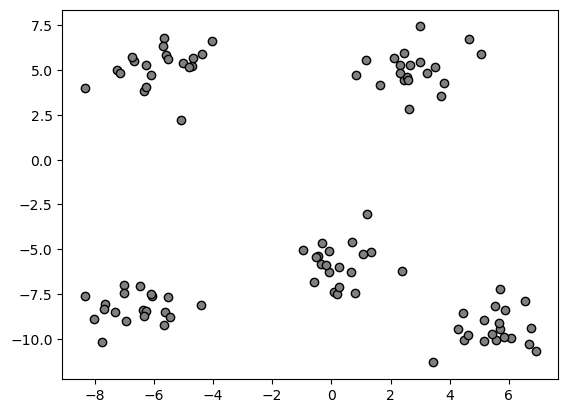

In [3]:
# 라벨링되지 않은 데이터 플랏
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [4]:
# K-means clustering
kmc = KMeans(n_clusters=5,
             init='random',
             n_init=10,
             max_iter=100,
             random_state=0)

kmc.fit(X)

label_kmc = kmc.labels_
print(label_kmc)

C:\Users\Playdata\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]


In [5]:
# 시각화를 위한 데이터 프레임 생성
kmc_columns = ['kmc_comp1', 'kmc_comp2']

X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(3)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3


In [6]:
# 타켓 클래스 종류 확인
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


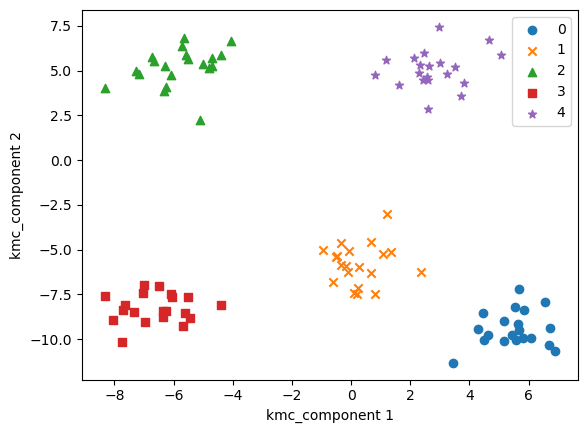

In [7]:
# K-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('kmc_component 1')
plt.ylabel('kmc_component 2')
plt.legend()

plt.show()

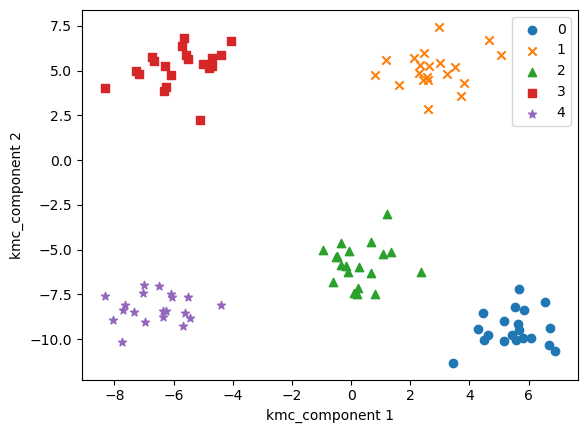

In [8]:
# 실제 타겟 플랏
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('kmc_component 1')
plt.ylabel('kmc_component 2')
plt.legend()

plt.show()

In [9]:
# 모형 평가
sil_score = silhouette_score(X, label_kmc)
sil_score

0.7598181300128782

## DBSCAN

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=.05, random_state=0)

print(X.shape)
print(y.shape)

(300, 2)
(300,)


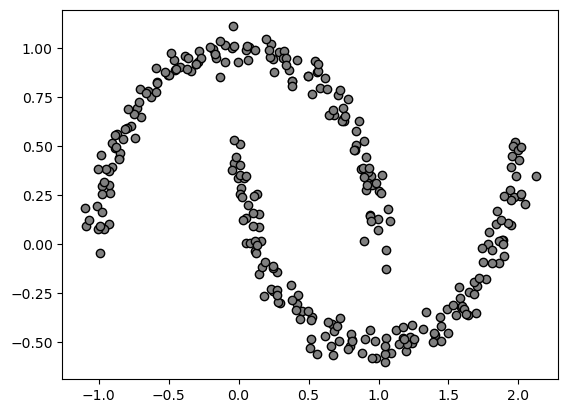

In [11]:
# 라벨링 되지 않은 데이터 플랏
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [12]:
# DB scan
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=.2) # eps: 데이터의 반경
dbs.fit(X)

label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [13]:
# 시각화를 위한 데이터프레임 생성
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
X_dbs_df.head(3)

,dbs_comp1,dbs_comp2,target,label_dbs
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,1,0
2,0.943261,0.346800,0,1


In [14]:
# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

{0, 1}
{0, 1}


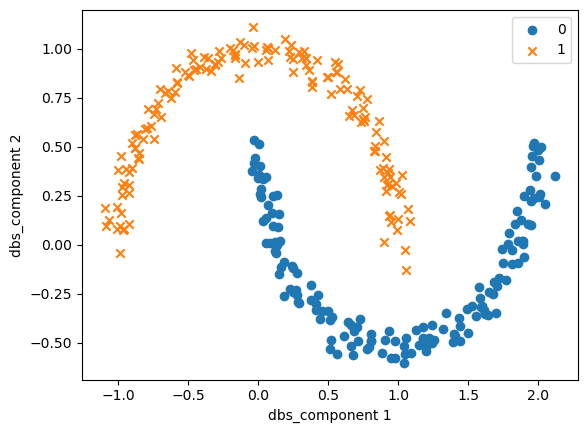

In [15]:
# DB scan을 이용한 데이터 플랏
df = X_dbs_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_dbs']==i]
    target_i = i
    X1 = df_i['dbs_comp1']
    X2 = df_i['dbs_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('dbs_component 1')
plt.ylabel('dbs_component 2')
plt.legend()

plt.show()


In [16]:
# 모형 평가
sil_score = silhouette_score(X, label_dbs)
sil_score

0.3284782012631504

## 가우시안 혼합 모형

In [17]:
# 데이터
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=2,
                  random_state=2)

print(X.shape)
print(y.shape)

(200, 2)
(200,)


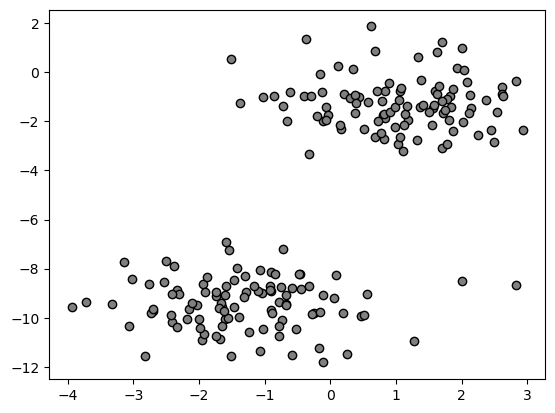

In [18]:
# 라벨링되지 않은 데이터 플랏
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [19]:
# 가우시안 혼합 모형
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)

gmm.fit(X)

label_gmm = gmm.predict(X)
label_gmm

C:\Users\Playdata\anaconda3\envs\work\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [26]:
# 시각화를 위한 데이터 프레임 생성
gmm_columns = ['gmm_comp1', 'gmm_comp2']

X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm
X_gmm_df.head(3)

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1


In [27]:
# 타겟 클래스 종류 확인
print(set(X_gmm_df['target']))
print(set(X_gmm_df['label_gmm']))

{0, 1}
{0, 1}


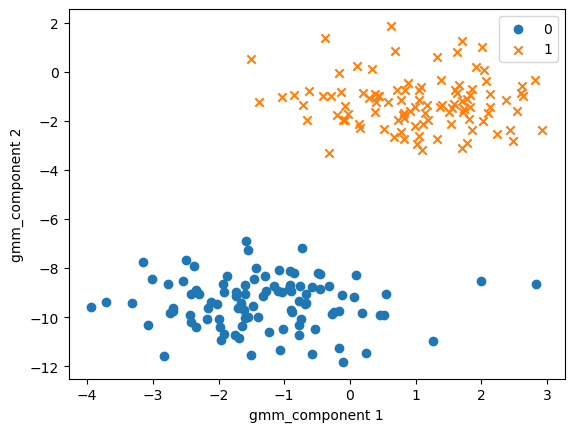

In [28]:
# 가우시안 혼합 모형을 이용한 데이터 플랏
df = X_gmm_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('gmm_component 1')
plt.ylabel('gmm_component 2')
plt.legend()

plt.show()

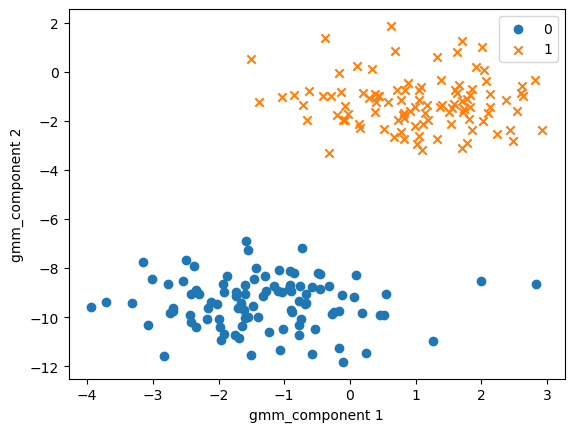

In [29]:
# 실제 타겟 플랏
df = X_gmm_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)
    
plt.xlabel('gmm_component 1')
plt.ylabel('gmm_component 2')
plt.legend()

plt.show()

In [30]:
# 모형 평가
sil_score = silhouette_score(X, label_gmm)
sil_score

0.7842908753561848

## 주성분 분석 Principal Component Analysis, PCA

In [32]:
df = pd.read_csv('c:/reposit/data/철원이형/wine_data.csv')
df.head(3)

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0


In [39]:
features = df.columns[:-1]

X = df[features]
y = df['class']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [41]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 차원
pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 차원 축소 확인
print(X_train_pca.shape)
print(X_test_pca.shape)

(133, 2)
(45, 2)


In [42]:
# 고윳값 확인
pca.singular_values_

array([25.3887705 , 18.00040359])

In [43]:
# 고유 벡터 확인
pca.components_

array([[ 0.14285263, -0.24443441, -0.01392104, -0.24517361,  0.1315099 ,
         0.38923734,  0.42471766, -0.30128613,  0.30523465, -0.10462106,
         0.30267149,  0.37266737,  0.29150867],
       [-0.50194071, -0.23015832, -0.31022311,  0.03872248, -0.23858952,
        -0.09688729, -0.01451474, -0.03693926, -0.0584635 , -0.54240798,
         0.28168064,  0.16944035, -0.35182263]])

In [44]:
# 설명된 분산
pca.explained_variance_

array([4.88325506, 2.45465553])

In [45]:
# 설명된 분산 비율
pca.explained_variance_ratio_

array([0.37281068, 0.18739996])

In [46]:
# DF 생성
pca_columns = ['pca_comp1', 'pca_comp2']

X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
y_tnl = y_train.reset_index(drop=True)
X_train_pca_df['target'] = y_tnl
X_train_pca_df.head(3)

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
